In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [162]:
df=pd.read_csv('C:/Users/Umesh/Desktop/Umesh Nishad/avocado.csv')

In [163]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [164]:
df.shape

(18249, 14)

Here we have 14 columns and 18249 rows. Out of 14 columns 2 columns are the target variable in which we have to build model on classification and regression

In [165]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here we have 0 null values in the dataset

<AxesSubplot:>

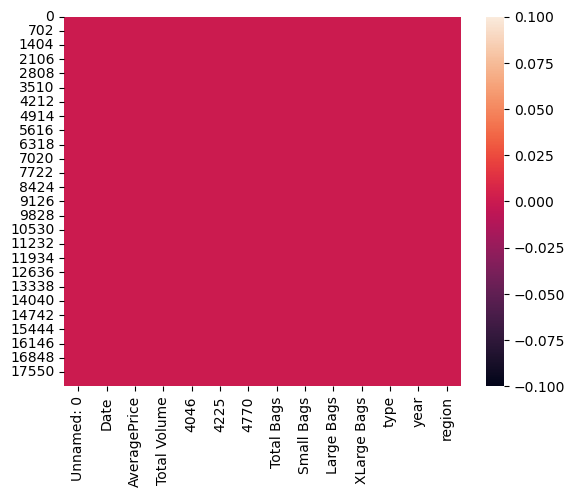

In [166]:
sns.heatmap(df.isnull())

By observing heatmap there is no null values present

In [167]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here we have 3 columns with object datatype,2 columns with int datatype and rest columns with float datatypes

In [168]:
# dropping Unnamed:0 as it is off no use

df.drop('Unnamed: 0',axis=1,inplace=True)

In [169]:
df.shape

(18249, 13)

In [170]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [171]:
# converting the date datatype into the datetime datatype which is an object in our dataset

df['Date']=pd.to_datetime(df['Date'], format= '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


By observing Info method below is observation

There is no null values into the dataset

1 column with date datatype

2 columns with object datatype

1 with int datatye and rest columns with float datatypes

In [172]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [173]:
df.columns.to_list() #converting into the list

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [174]:
df.isnull().sum().sum()

0

In [175]:
df.duplicated().sum()

0

There is no duplicates into the dataset

In [176]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

In [177]:
# separating Numerical and categorical columns

#checking for categorical columns

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('Categorical columns    :',categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('Numerical columns    :',numerical_col) 

Categorical columns    : ['type', 'region']


Numerical columns    : ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [178]:
# checking the unique values of each columns using dataframe

df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [179]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

Average price is an target variable and we have build model on regression 

In [180]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Here region is an categorical data and this is an multiclass classification problem and we have to build model on classifaction as region is an target variable

In [181]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df        

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [182]:
df['region'].value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

Here we have converted the categorical data into the numerical by using ordinal encoder

In [183]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


By observing describe method method below is the observations,

The count of all columns is same means there is no null values into the dataset

The median value is greater than mean in 4046,Total Bags, Small bags, XLarge Bags, type and region means data is skewed to left

The median value is less than mean in AveragePrice,TotalVolume,4225,Large Bags means data is skewed to left

And there is huge gap between 75 percentile and max in AveragePrice,4046,4225,4770,Small Bags,Marge Bags means outliers exist in dataset

We also observed the std, min and 25th percentile of the describe method

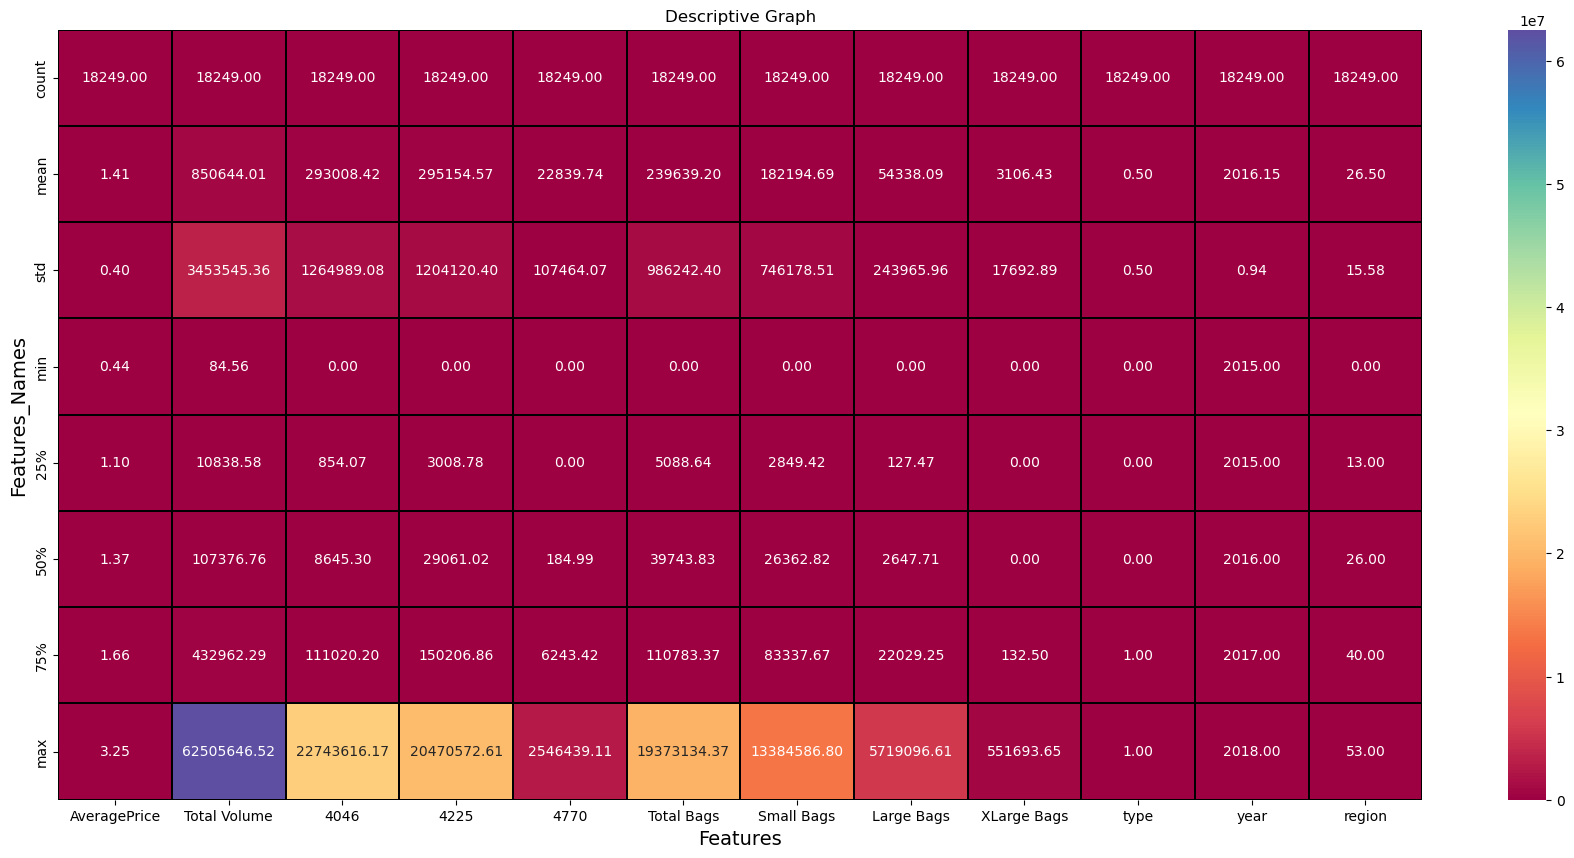

In [184]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, cmap='Spectral', linecolor='black',linewidth=0.2, fmt='0.2f')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features_Names', fontsize=14)
plt.title('Descriptive Graph')
plt.show()

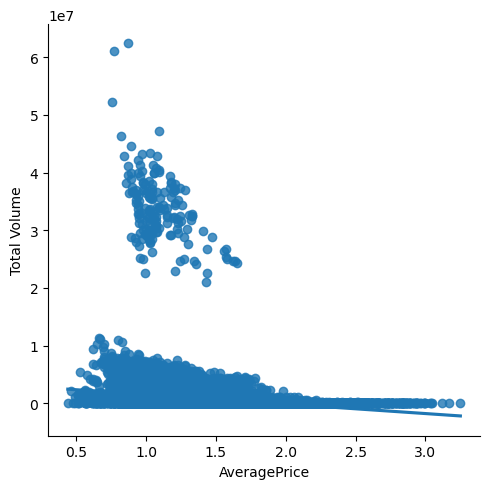

In [185]:
sns.lmplot(x='AveragePrice',y='Total Volume',data=df,palette='colorblind')

Total Volume has no relationship with the AveragePrice

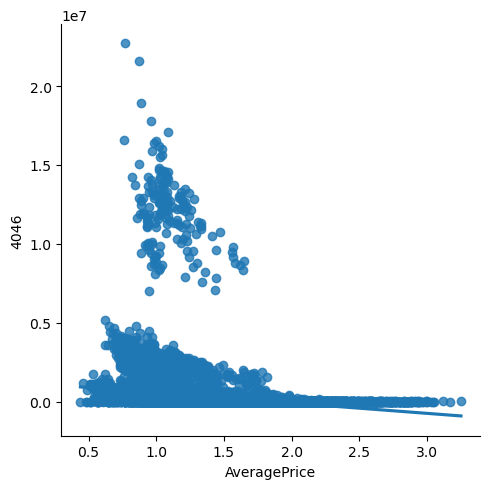

In [186]:
 sns.lmplot(x='AveragePrice',y='4046',data=df,palette='colorblind')

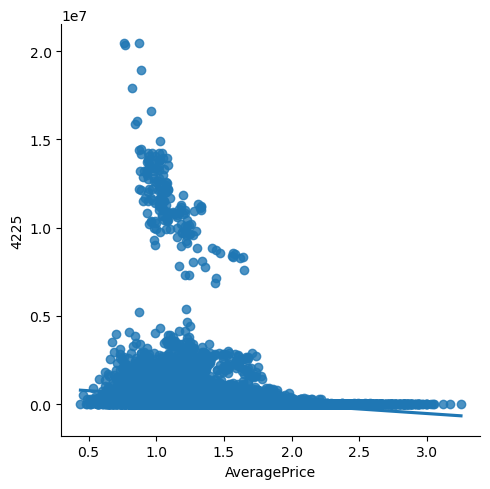

In [187]:
 sns.lmplot(x='AveragePrice',y='4225',data=df,palette='colorblind')

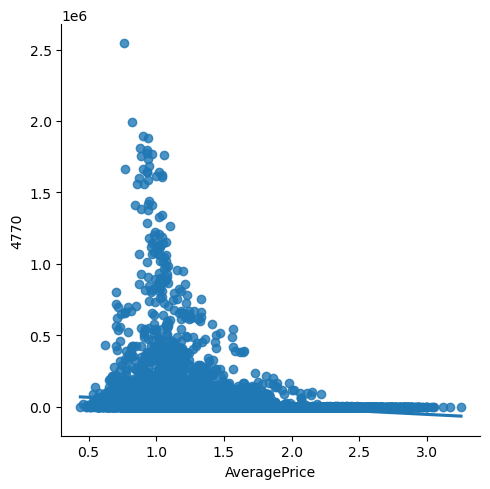

In [188]:
 sns.lmplot(x='AveragePrice',y='4770',data=df,palette='colorblind')

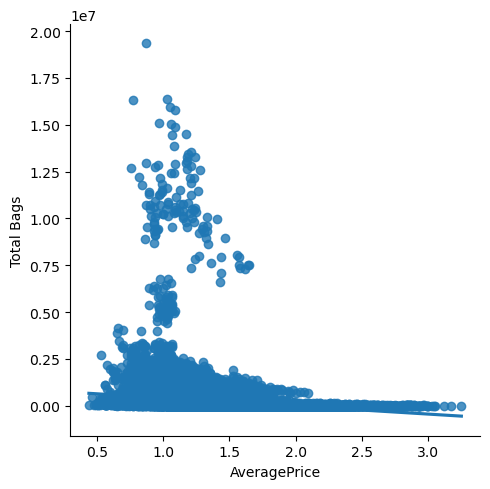

In [189]:
 sns.lmplot(x='AveragePrice',y='Total Bags',data=df,palette='colorblind')

0.0    9126
1.0    9123
Name: type, dtype: int64


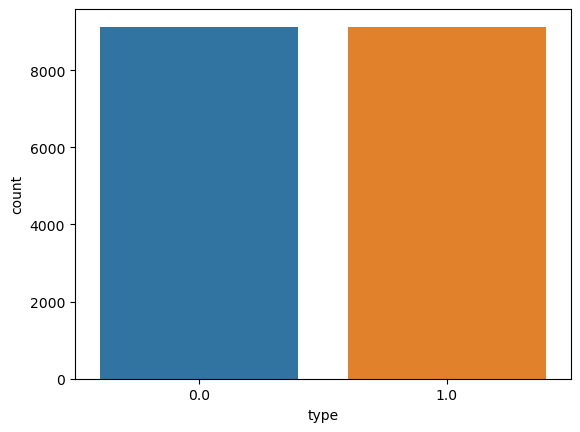

In [190]:
ax=sns.countplot(x='type',data=df)
print(df['type'].value_counts())

Here 0 means conventional and 1 means organic and we observe that there is no much difference between both of them

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


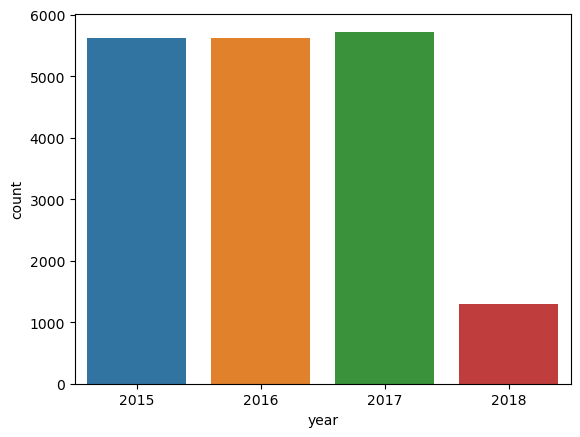

In [191]:
ax=sns.countplot(x='year',data=df)
print(df['year'].value_counts())

Here count of years is very less in 2018 as compared to others

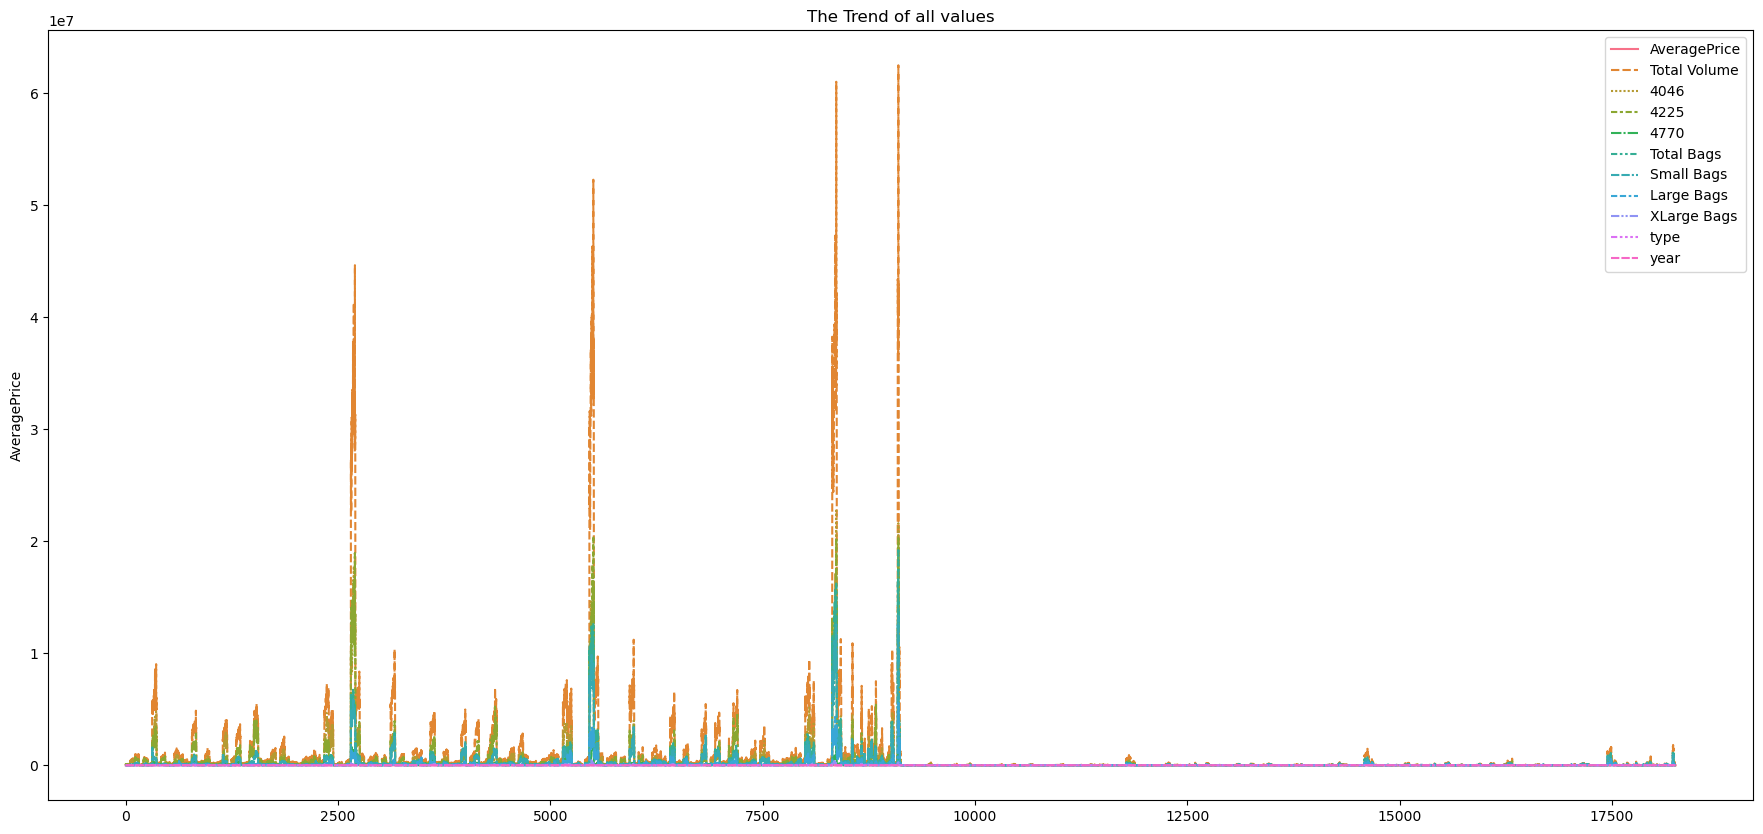

In [192]:
#for all clumns use linepot

plt.figure(figsize=(22,10))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('AveragePrice')
plt.title('The Trend of all values')
plt.show()

In [193]:
# Here we are dropping date column as it is not contribtuting anythings towards the target variable and also we have year column so we can se that column

df.drop('Date',axis=1,inplace=True)

In [194]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


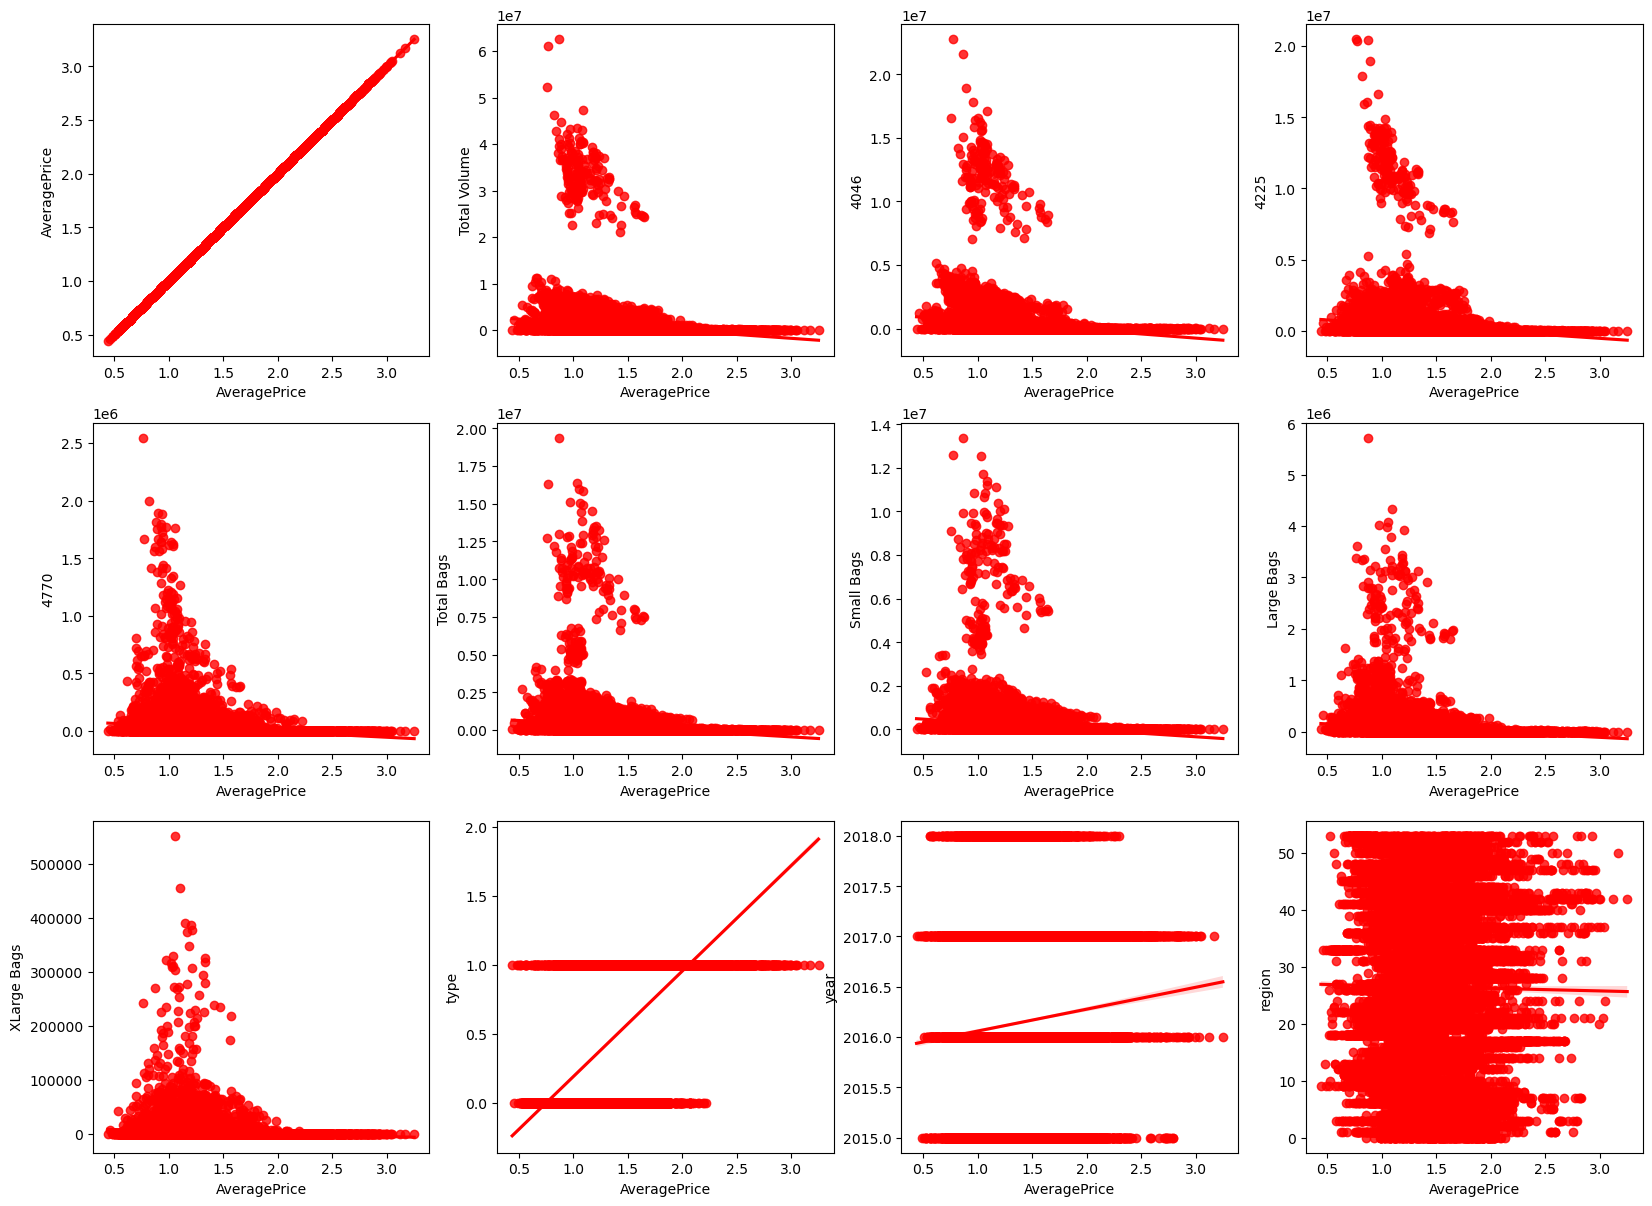

In [195]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='AveragePrice',y=i,data=df,color='r')
        plt.xlabel('AveragePrice')
        plt.ylabel(i)
        p+=1
plt.show()        

Here by observing the reg plot we are not able to find any kind of positive relationship with the AveragePrice

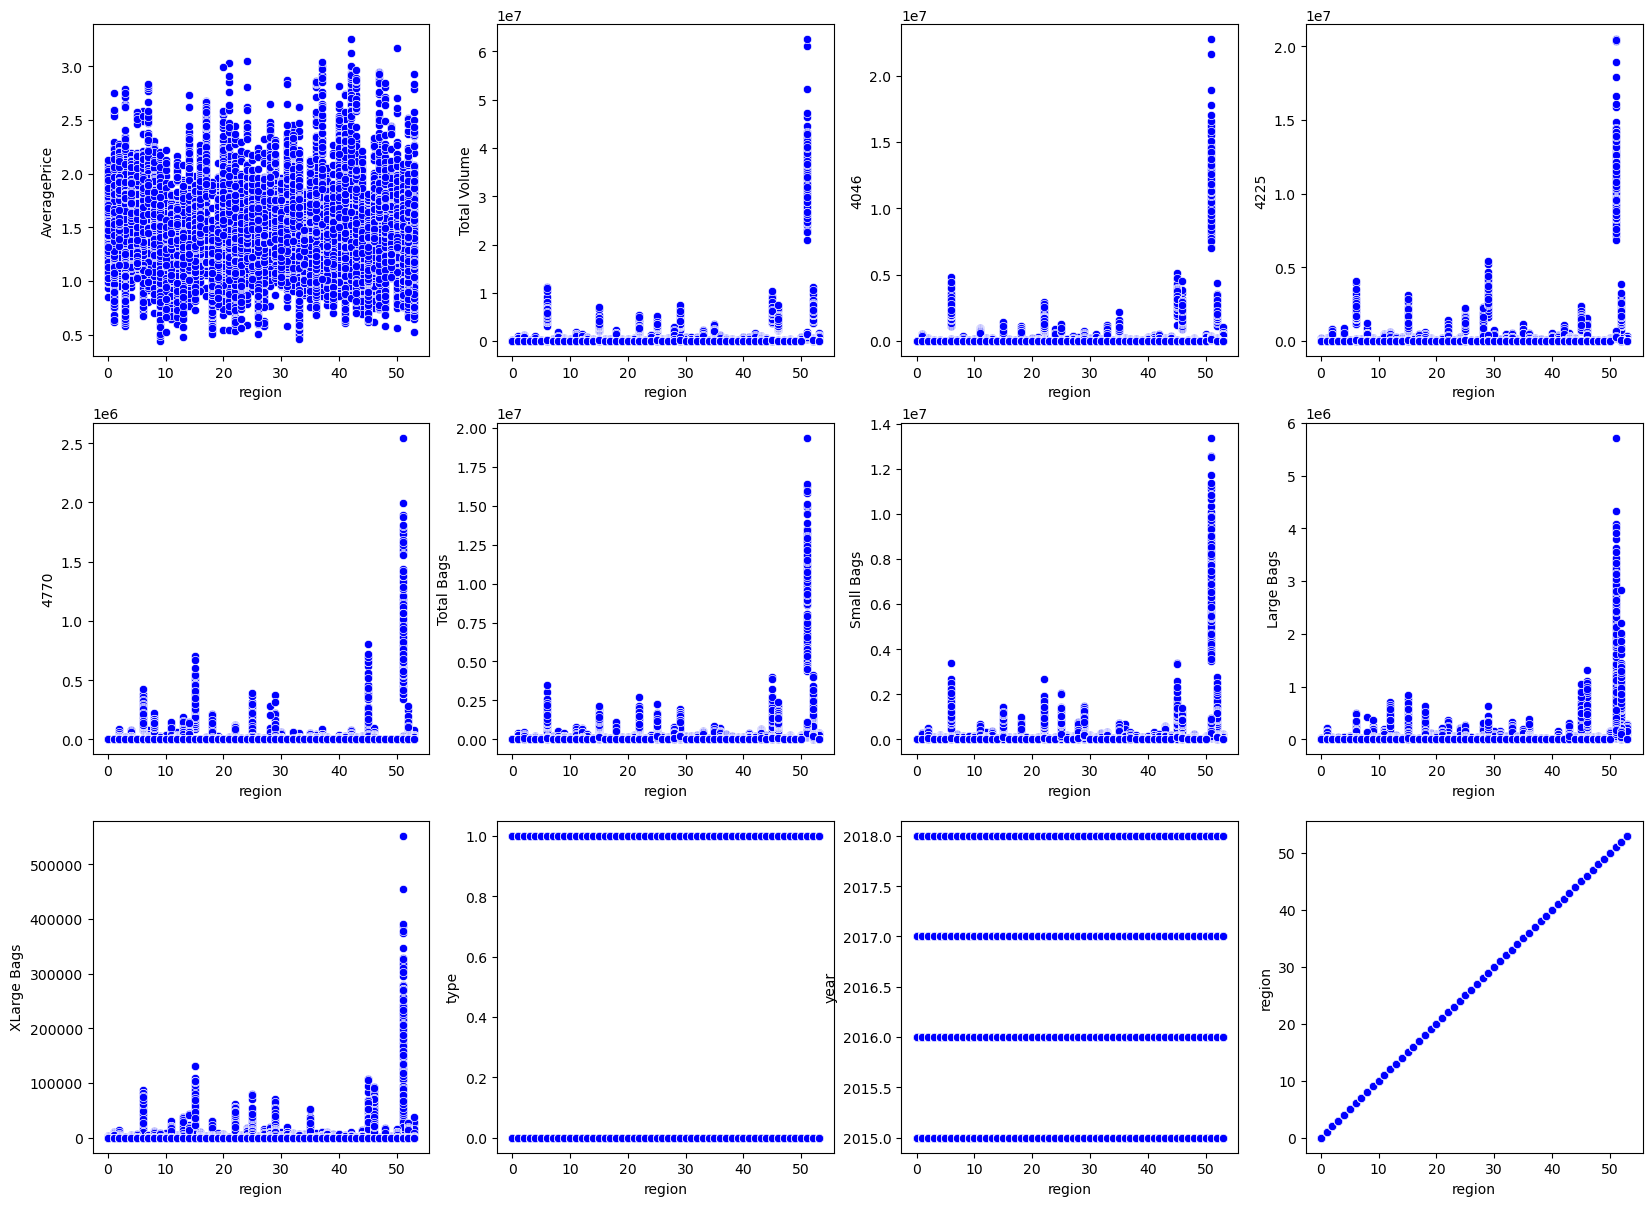

In [196]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='region',y=i,data=df,color='b')
        plt.xlabel('region')
        plt.ylabel(i)
        p+=1
plt.show() 

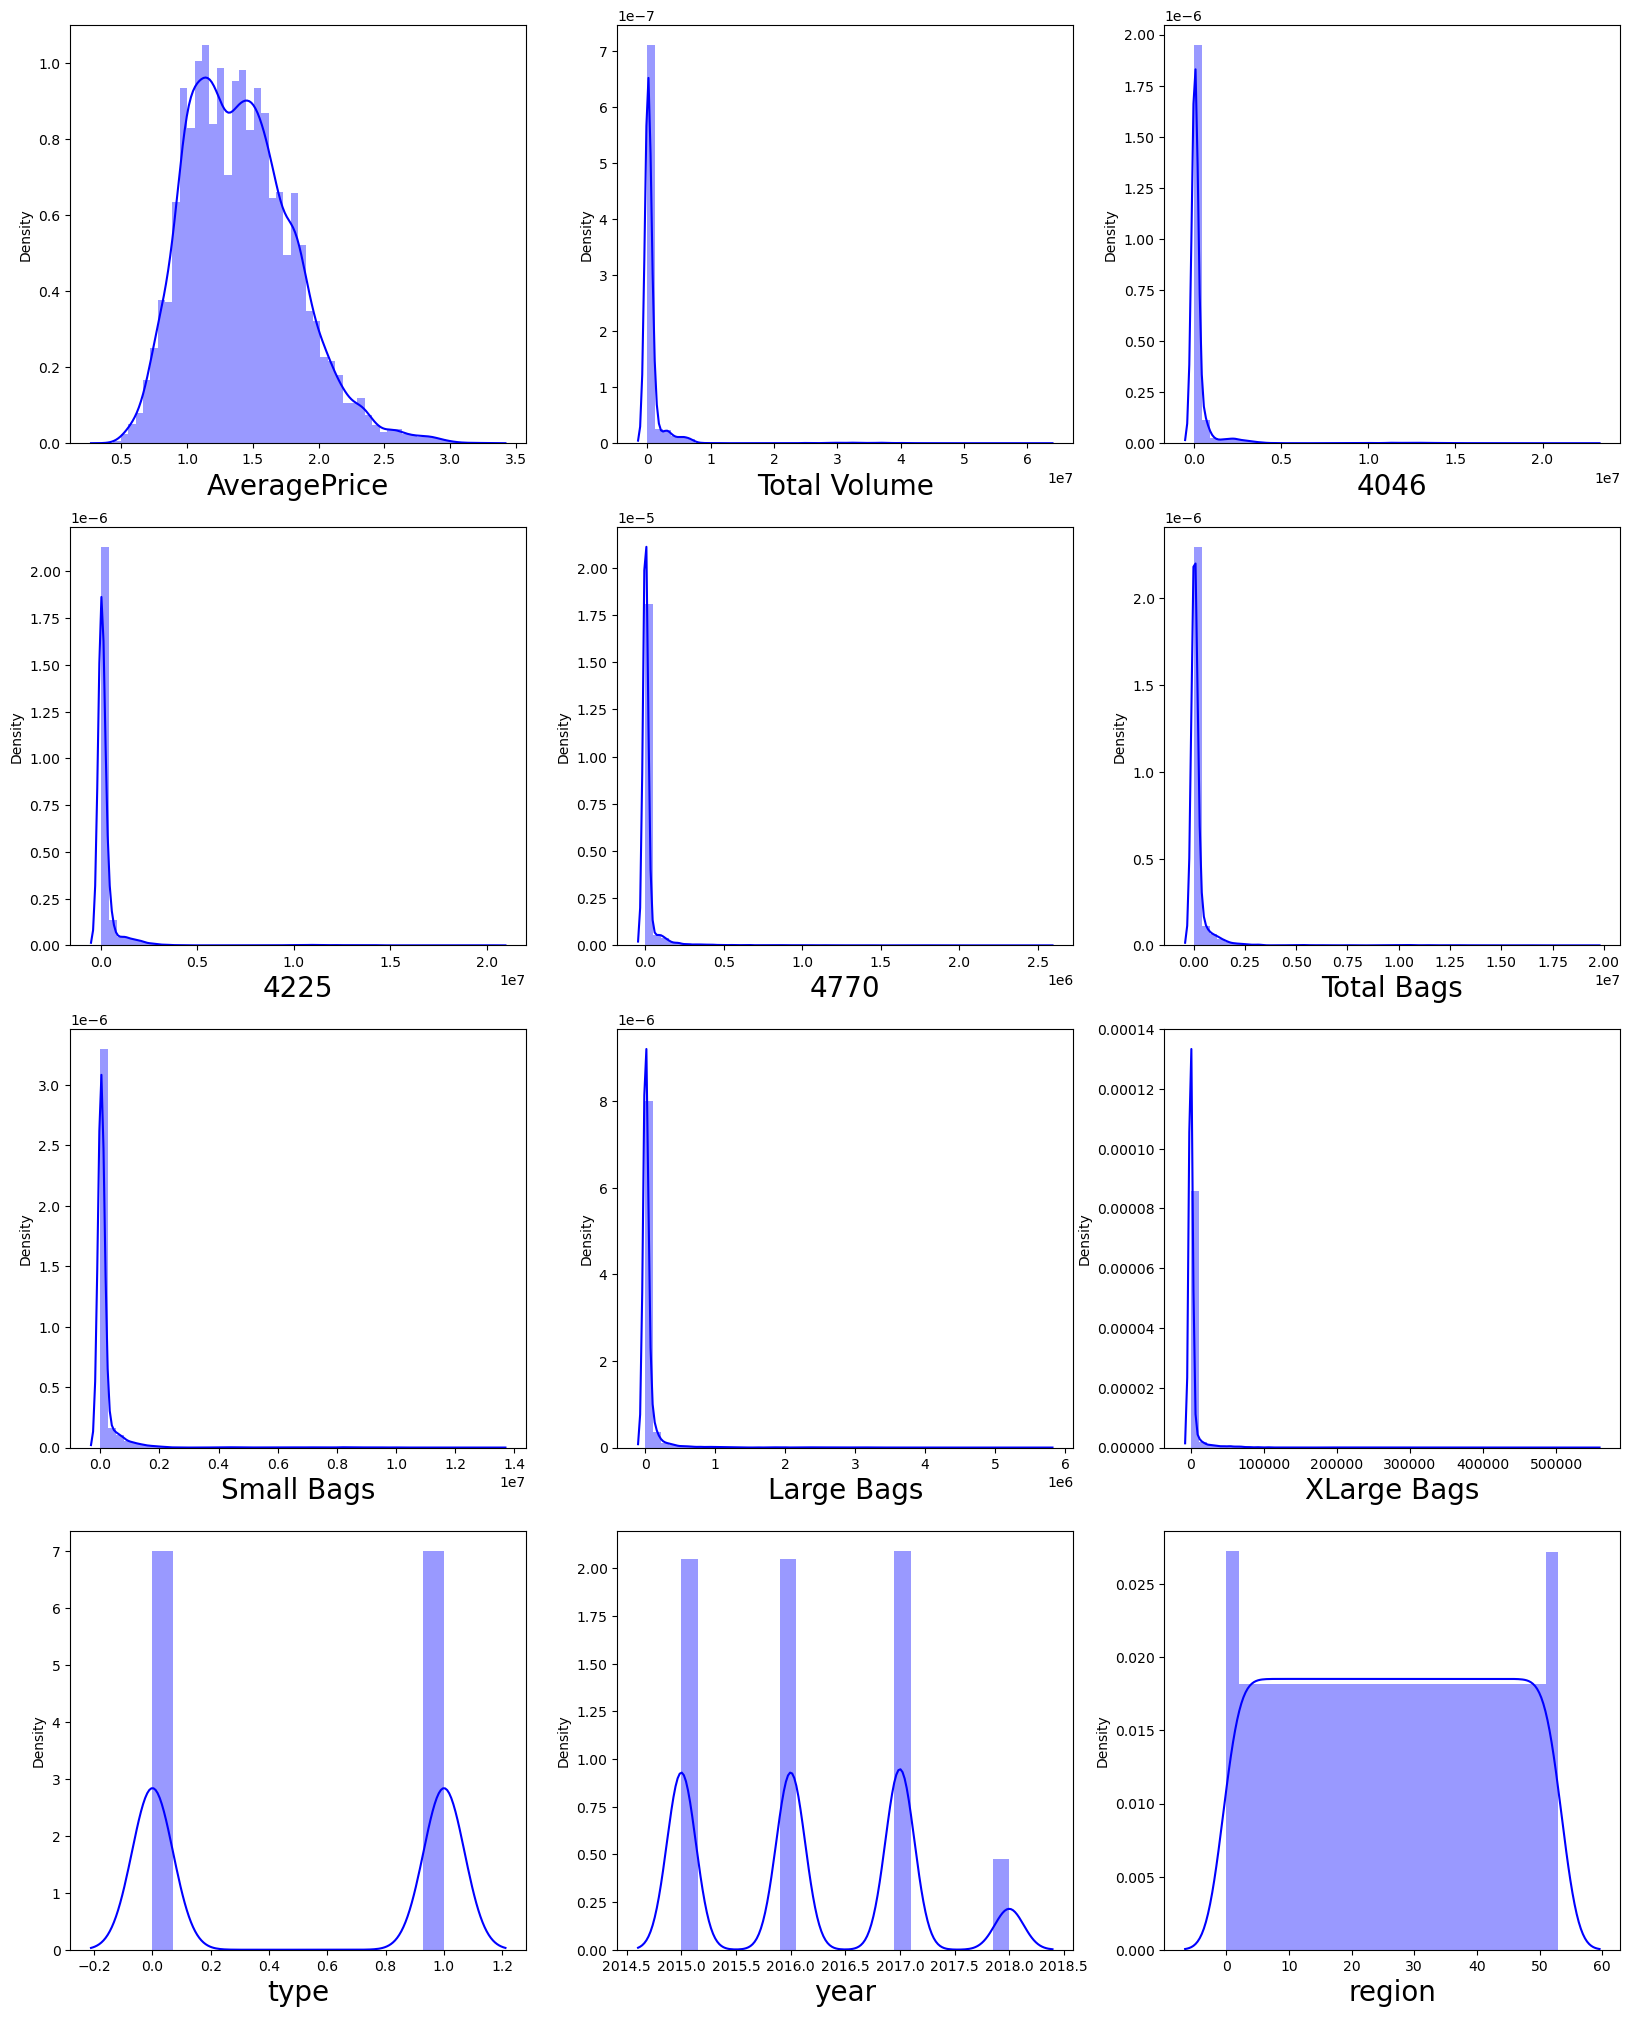

In [197]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

By observing scatter plot Total Volume,4225,4770, Total Bags, Small Bags,Large Bags,XLarge Bags having skewness into the data rest is distributed normally

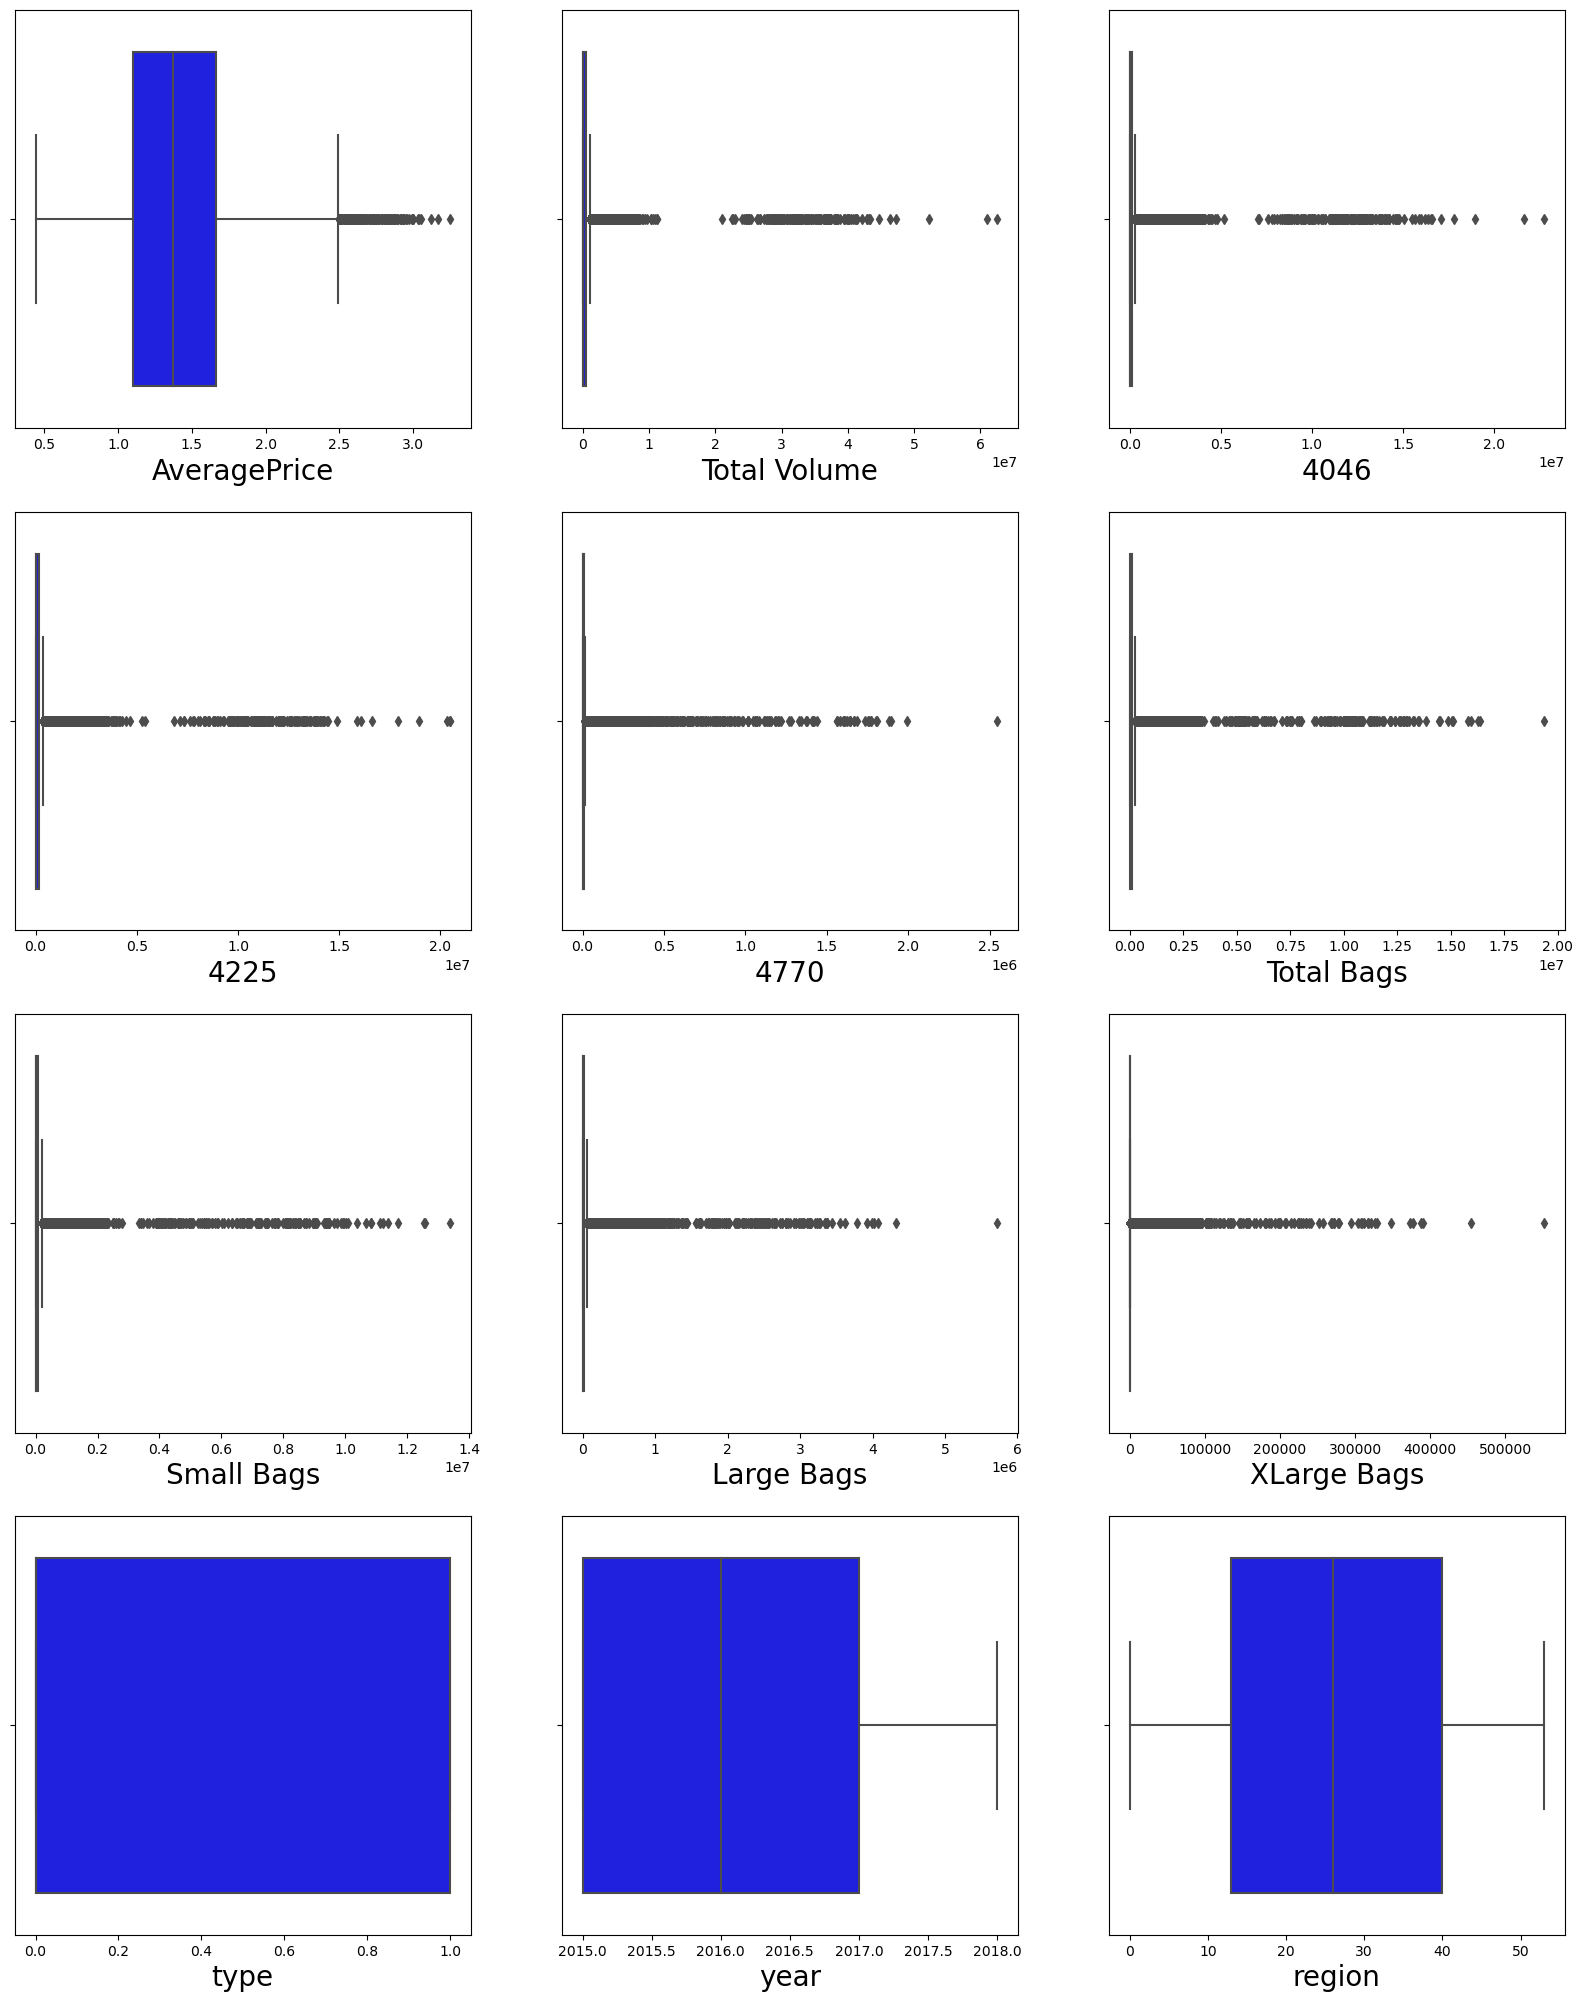

In [198]:
# lets check the outliers using box plot

plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

Here we have outliers in all the columns except type,year and region

In [199]:
# lets treat the outliers

from scipy.stats import zscore
out_features=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_features))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [200]:
# threshold = 3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [201]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(17651, 12)

In [202]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (18249, 12)
New Dataframe (17651, 12)


In [203]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 3.276891884486821


we have treated the outliers and data loss is in acceptable range

In [204]:
df=df1

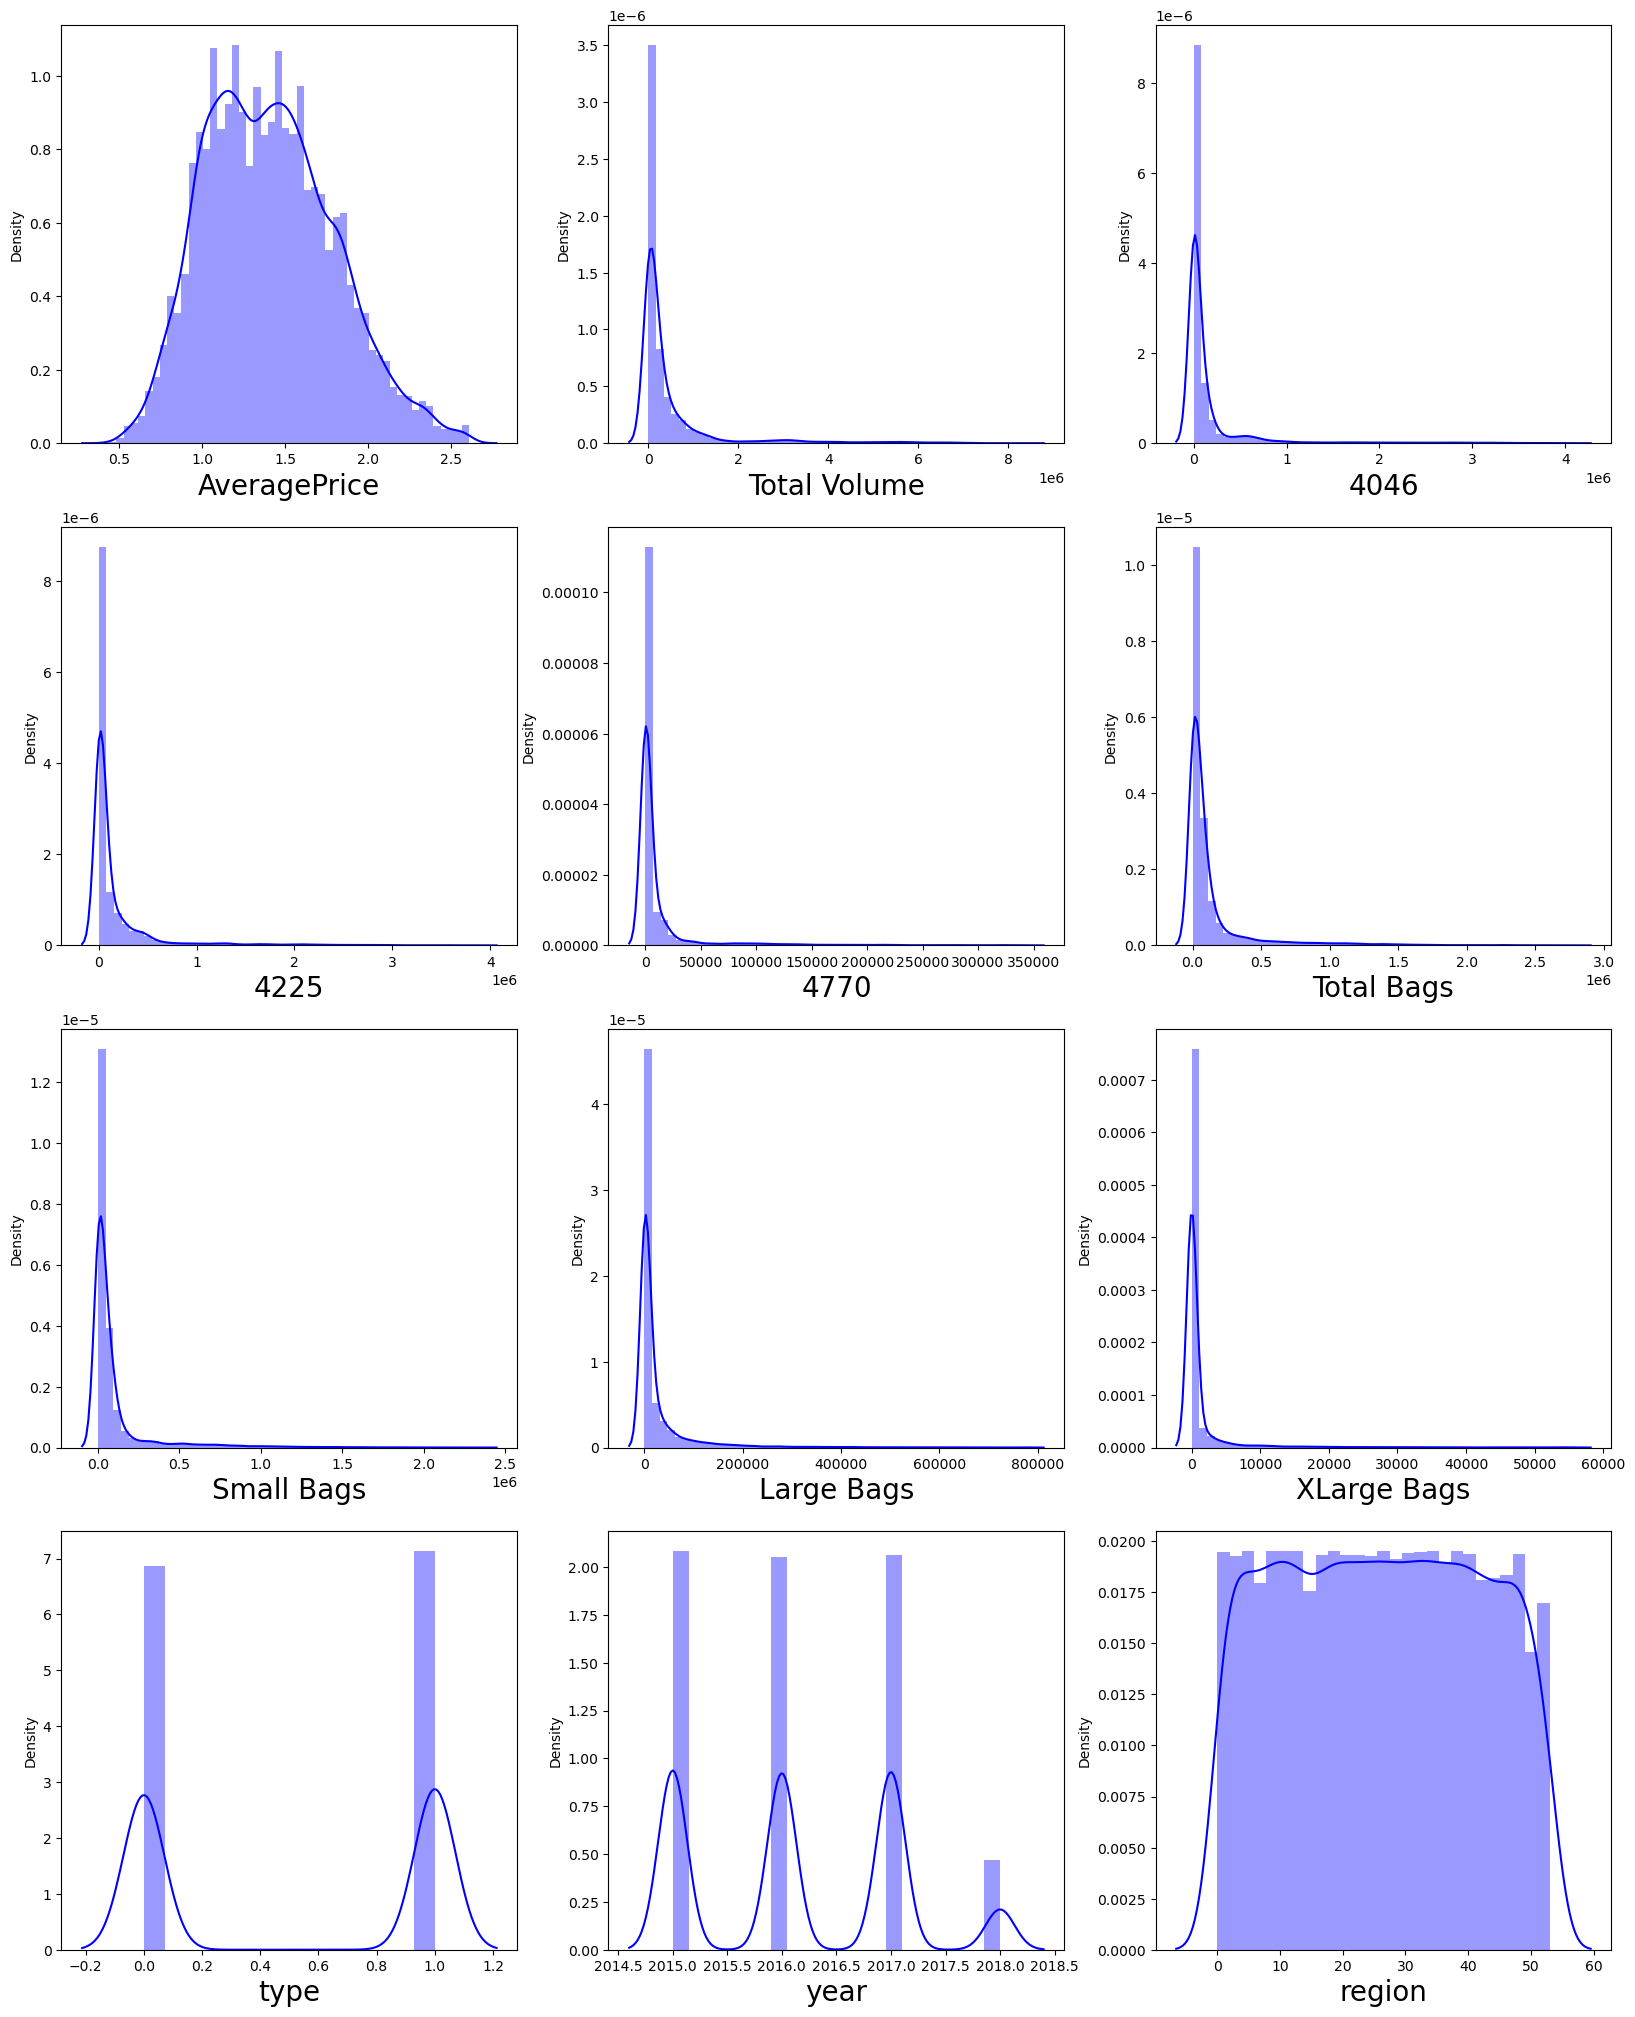

In [205]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

In [206]:
# lets check the skewnesss

df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [207]:
# removing skewness using cube root

df['Total Volume']=np.cbrt(df['Total Volume'])
df['4046']=np.cbrt(df['4046'])
df['4225']=np.cbrt(df['4225'])
df['4770']=np.cbrt(df['4770'])
df['Total Bags']=np.cbrt(df['Total Bags'])
df['Small Bags']=np.cbrt(df['Small Bags'])
df['Large Bags']=np.cbrt(df['Large Bags'])
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])

In [208]:
df.skew()

AveragePrice    0.377432
Total Volume    1.240435
4046            1.555876
4225            1.277025
4770            1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

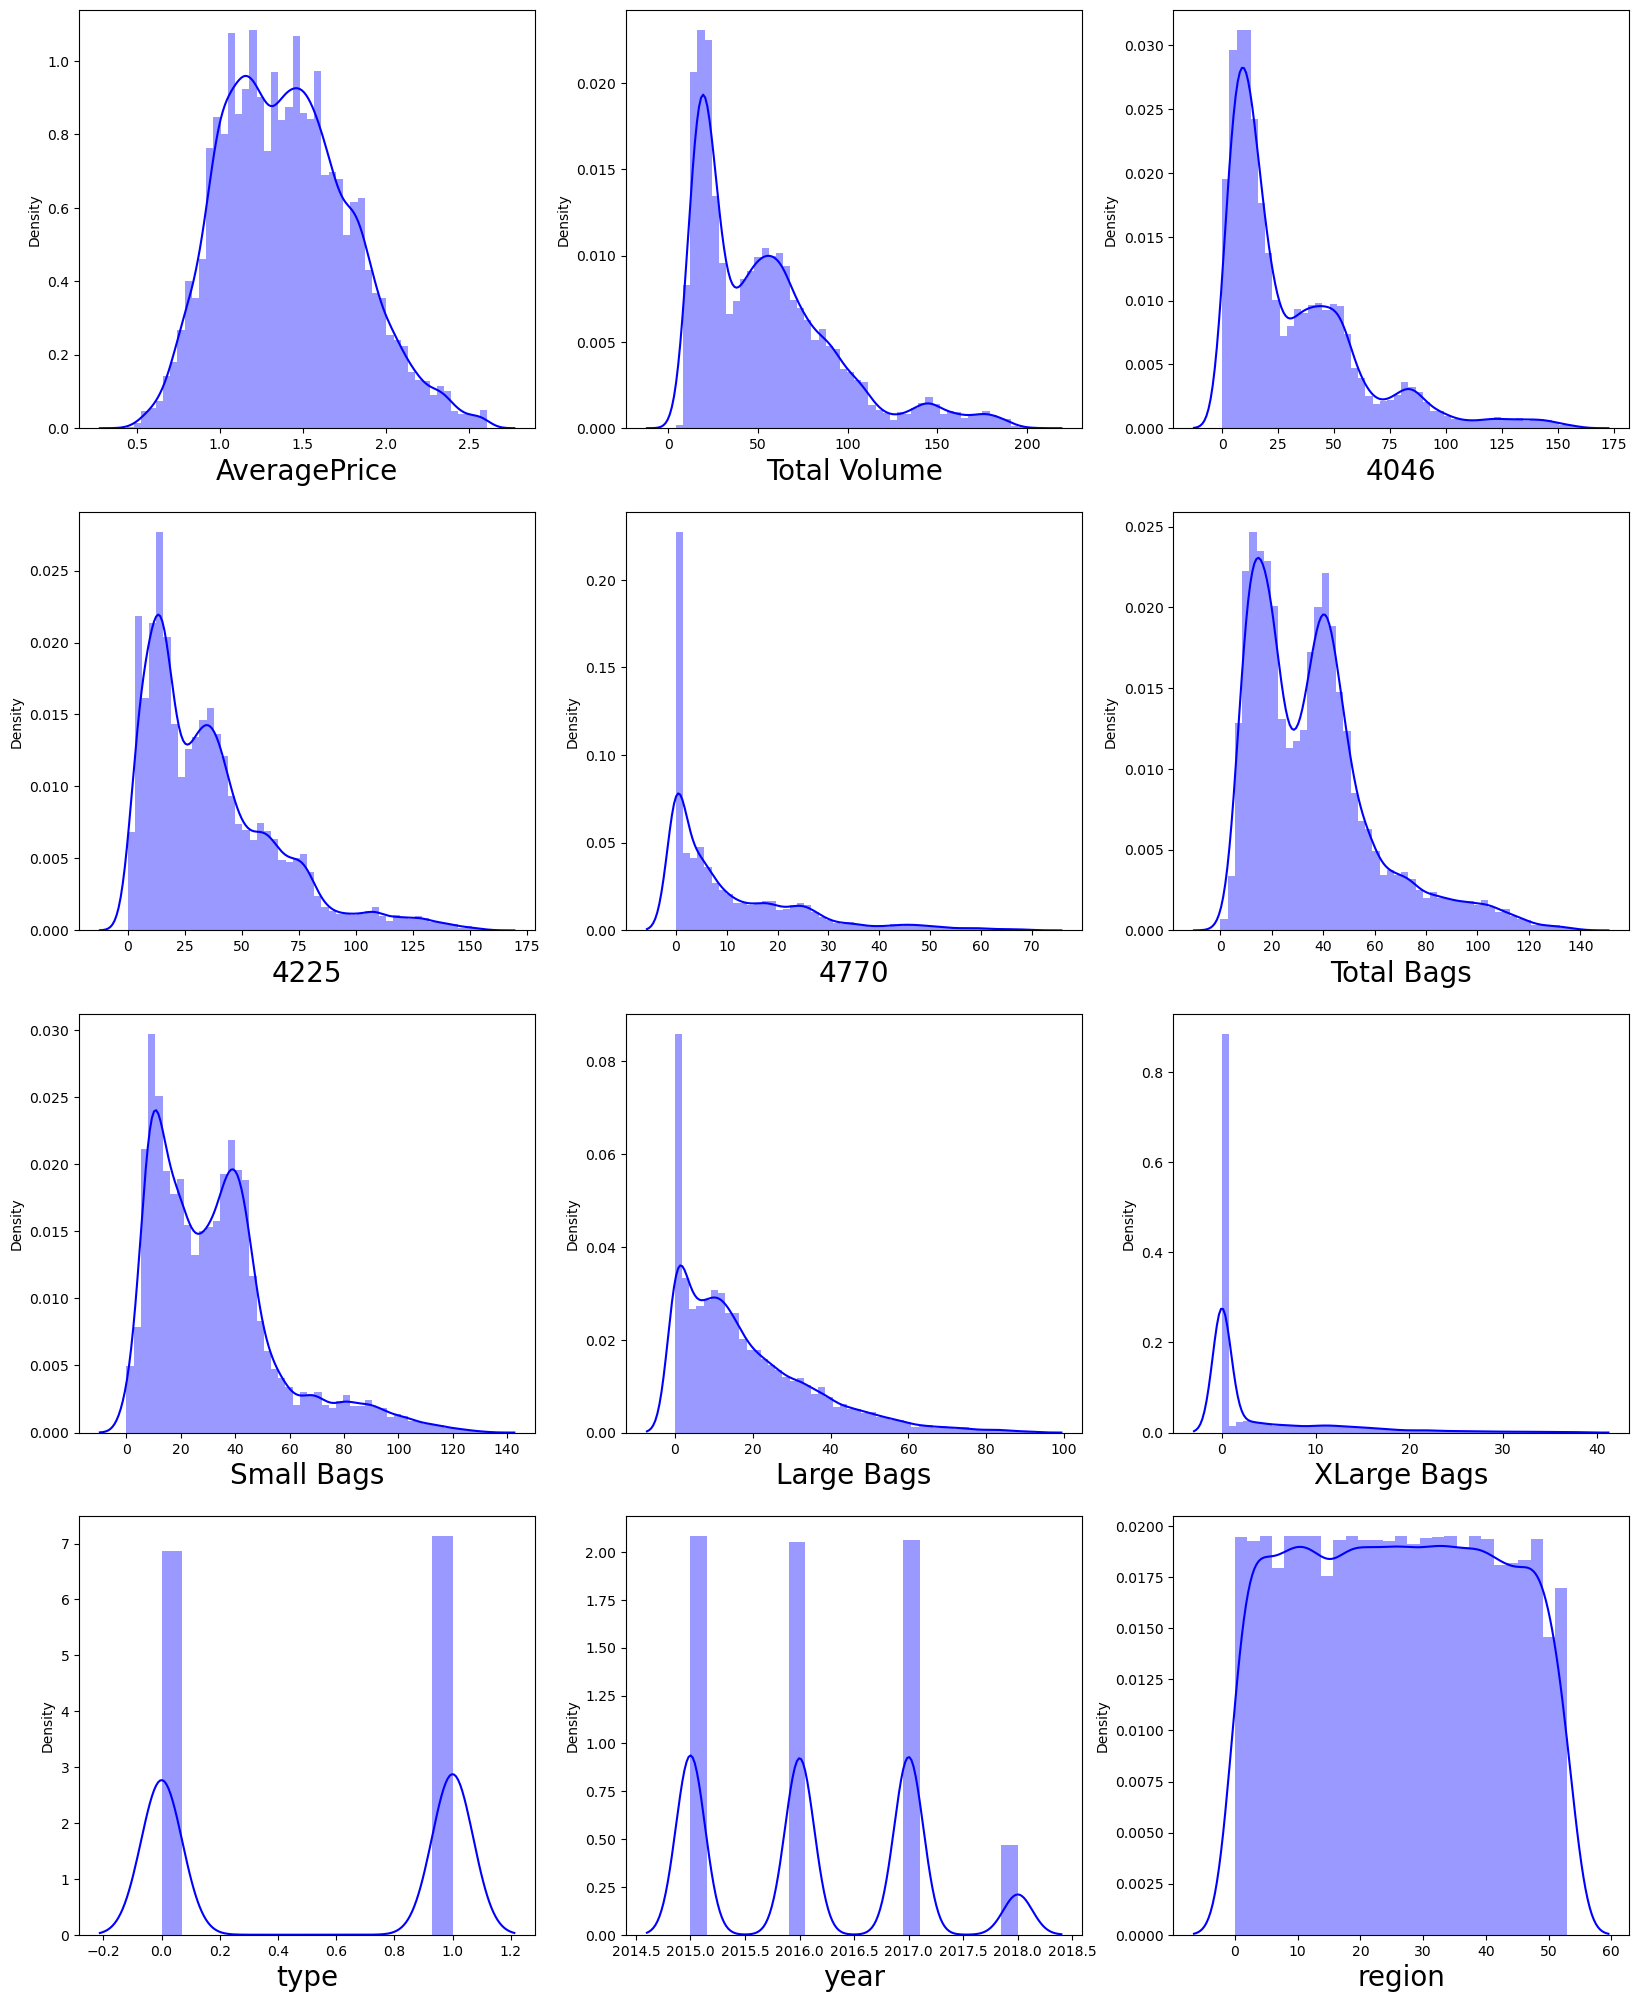

In [209]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

We have treated the outliers and skewness and now data is distributed almost normally in all columns

In [210]:
# now we are checking the colinear using corr()

df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.528935,-0.538927,-0.430888,-0.451147,-0.504768,-0.458453,-0.454450,-0.300001,0.613150,0.091704,-0.003242
Total Volume,-0.528935,1.000000,0.903102,0.940370,0.793520,0.953857,0.941018,0.731893,0.623303,-0.717424,0.039580,0.076952
4046,-0.538927,0.903102,1.000000,0.742185,0.704297,0.833500,0.818643,0.671638,0.570552,-0.649432,-0.007901,0.155491
4225,-0.430888,0.940370,0.742185,1.000000,0.778158,0.863948,0.861860,0.626928,0.566096,-0.687835,-0.020441,0.025405
4770,-0.451147,0.793520,0.704297,0.778158,1.000000,0.721926,0.730112,0.497304,0.619253,-0.642326,-0.089506,-0.030916
Total Bags,-0.504768,0.953857,0.833500,0.863948,0.721926,1.000000,0.973676,0.792434,0.628105,-0.658982,0.171073,0.087521
Small Bags,-0.458453,0.941018,0.818643,0.861860,0.730112,0.973676,1.000000,0.656224,0.628709,-0.659243,0.152041,0.076144
Large Bags,-0.454450,0.731893,0.671638,0.626928,0.497304,0.792434,0.656224,1.000000,0.434630,-0.475409,0.177150,0.117769
XLarge Bags,-0.300001,0.623303,0.570552,0.566096,0.619253,0.628105,0.628709,0.434630,1.000000,-0.520516,0.155129,-0.044703
type,0.613150,-0.717424,-0.649432,-0.687835,-0.642326,-0.658982,-0.659243,-0.475409,-0.520516,1.000000,0.003867,0.018409


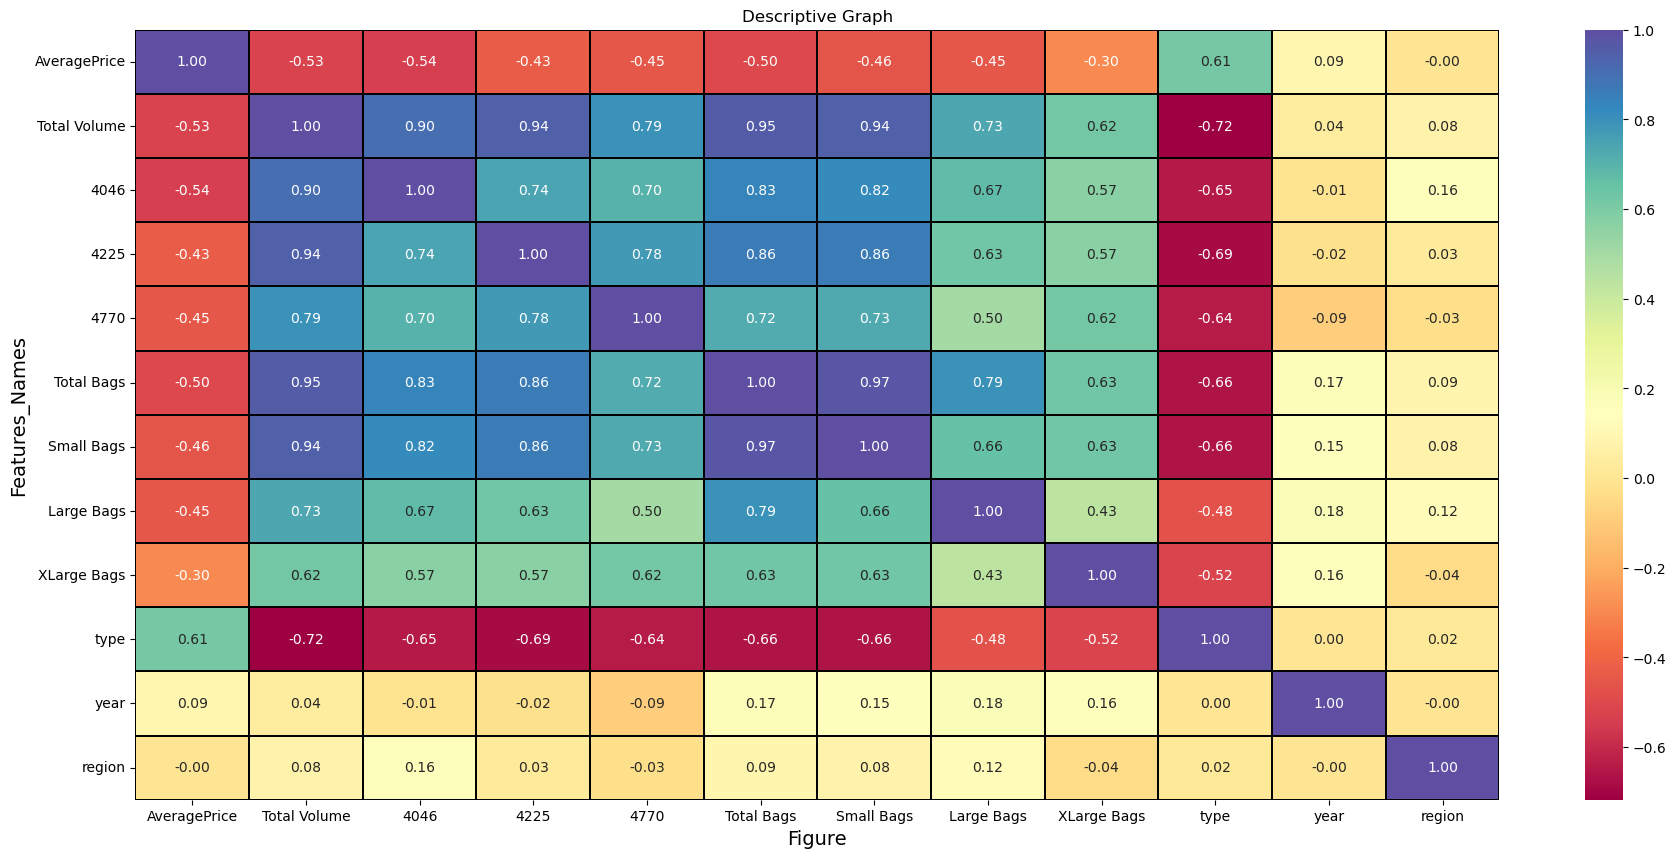

In [211]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True, cmap='Spectral', linecolor='black',linewidth=0.2, fmt='0.2f')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features_Names', fontsize=14)
plt.title('Descriptive Graph')
plt.show()

In [212]:
cor=df.corr()
cor["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
type            0.613150
year            0.091704
region         -0.003242
XLarge Bags    -0.300001
4225           -0.430888
4770           -0.451147
Large Bags     -0.454450
Small Bags     -0.458453
Total Bags     -0.504768
Total Volume   -0.528935
4046           -0.538927
Name: AveragePrice, dtype: float64

Here type having positive corelation, Xlarge Bags,4225,4770, Large Bags, Small Bags, Total Bags, Total Volumne and 4046 having negative corelation with the AveragePrice

In [213]:
cor=df.corr()
cor["region"].sort_values(ascending=False)

region          1.000000
4046            0.155491
Large Bags      0.117769
Total Bags      0.087521
Total Volume    0.076952
Small Bags      0.076144
4225            0.025405
type            0.018409
AveragePrice   -0.003242
year           -0.004417
4770           -0.030916
XLarge Bags    -0.044703
Name: region, dtype: float64

Here there is no relation with the target variable which is region

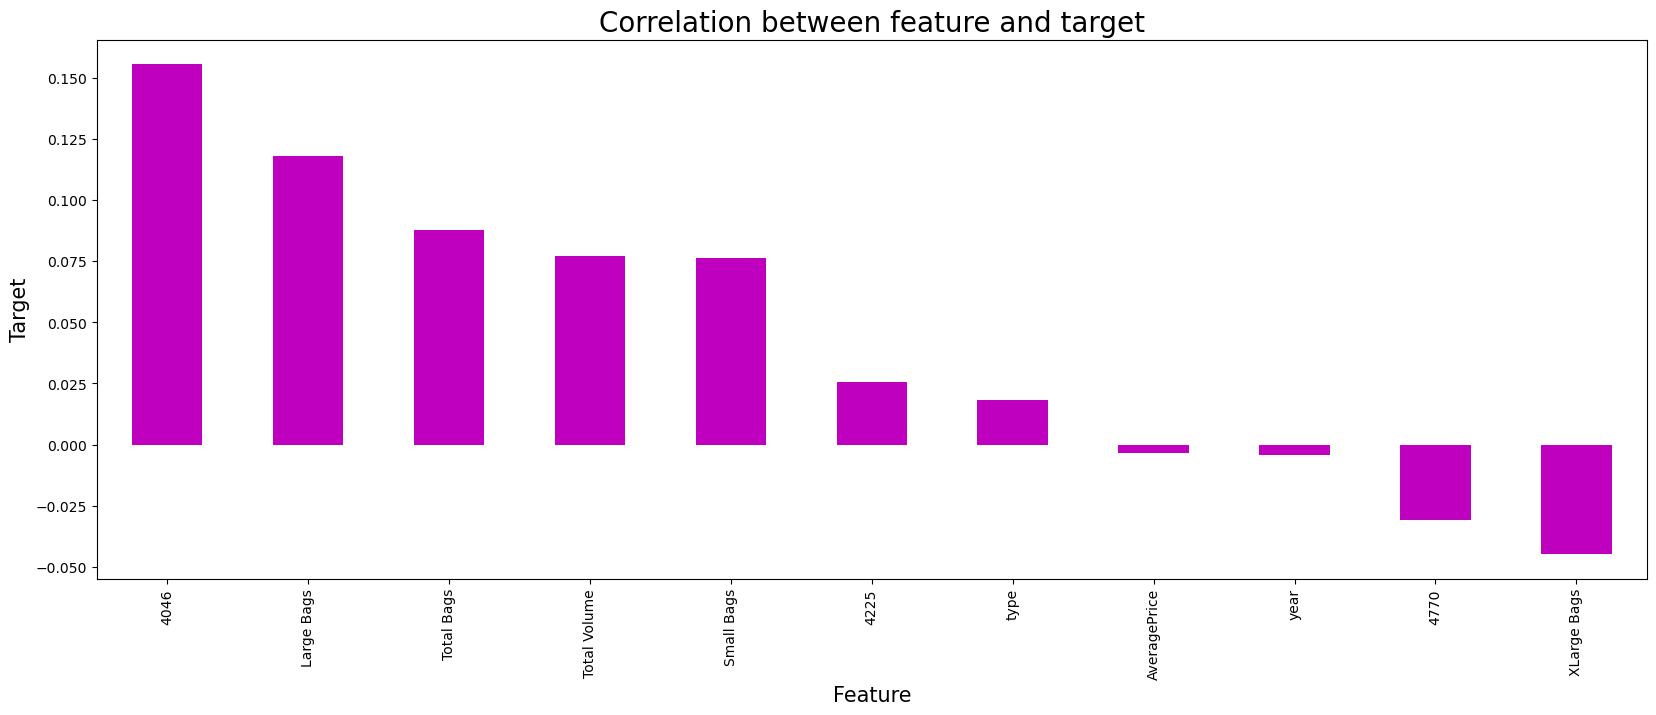

In [214]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

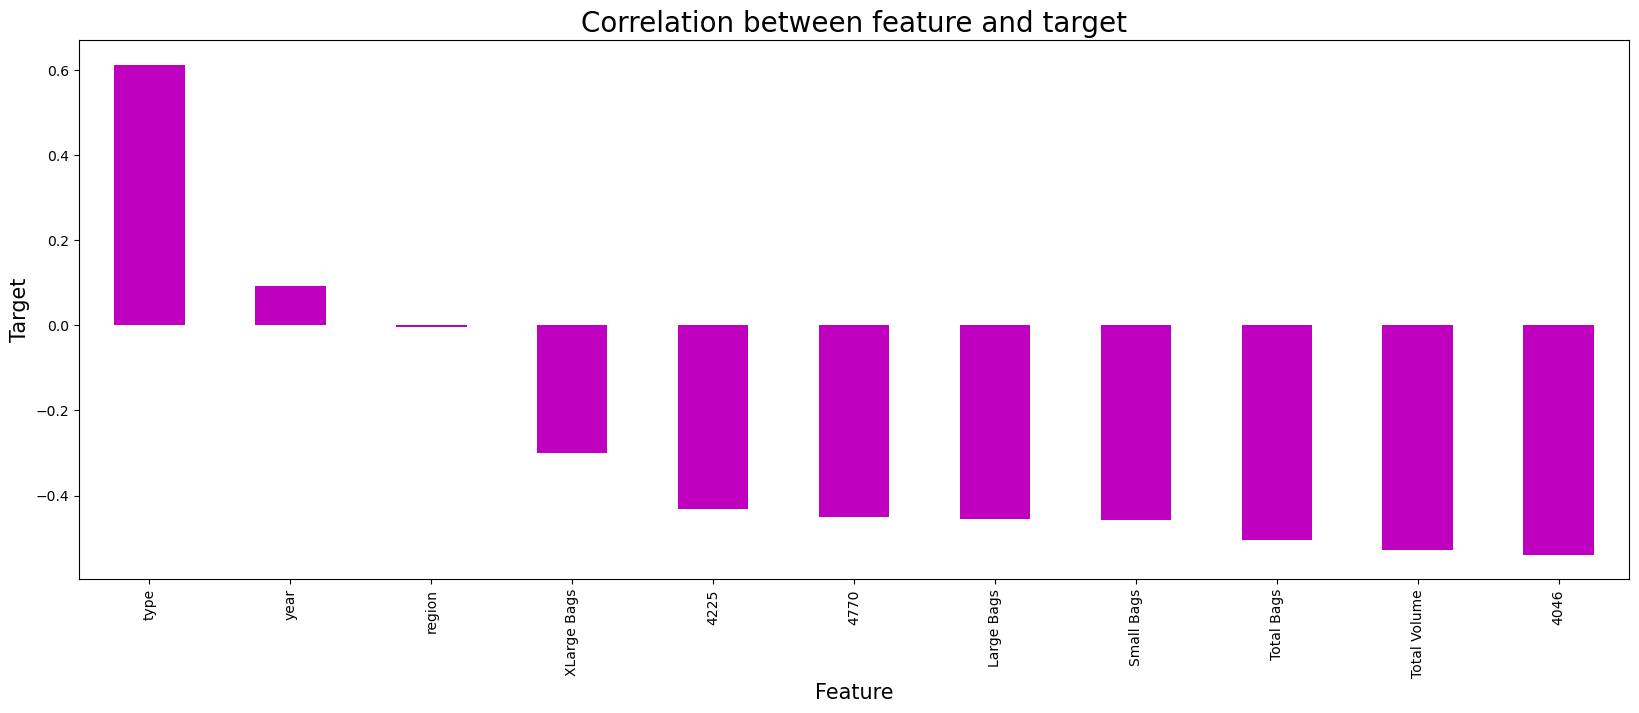

In [215]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

In [216]:
# separating the indepent and target variables into x and y for the regression problem 

x=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']

In [217]:
x.shape

(17651, 11)

In [218]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [219]:
# feature sclaing using standrd scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013,-1.695495
1,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013,-1.695495
2,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013,-1.695495
3,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013,-1.695495
4,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013,-1.695495
...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756,1.747054
17647,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756,1.747054
17648,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756,1.747054
17649,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756,1.747054


In [220]:
# finding variance inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

,VIF Values,Features
0,202.503330,Total Volume
1,24.866826,4046
2,40.464243,4225
3,3.301017,4770
4,117.508648,Total Bags
5,63.622958,Small Bags
6,9.031383,Large Bags
7,1.968262,XLarge Bags
8,2.182953,type
9,1.317551,year


Here Total Volume has highest VIF value means this is highly corelated with other columns but we cannot going to delete that column as all the dataset is depend the volume only

In [221]:
#importing necessary libaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [222]:
# finding the best random state

maxACCU=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=i
print("Maximum r2 score is:", maxACCU,  "on random state:",maxRS)        
        

Maximum r2 score is: 0.524534016931449 on random state: 6


In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression

In [225]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.524534016931449
R2_score on training data: 49.70214481021639
Mean absolute error: 0.20935372650239523
Mean Squared Error: 0.07106107543287148
Root Mean Squared Error: 0.26657283326113984


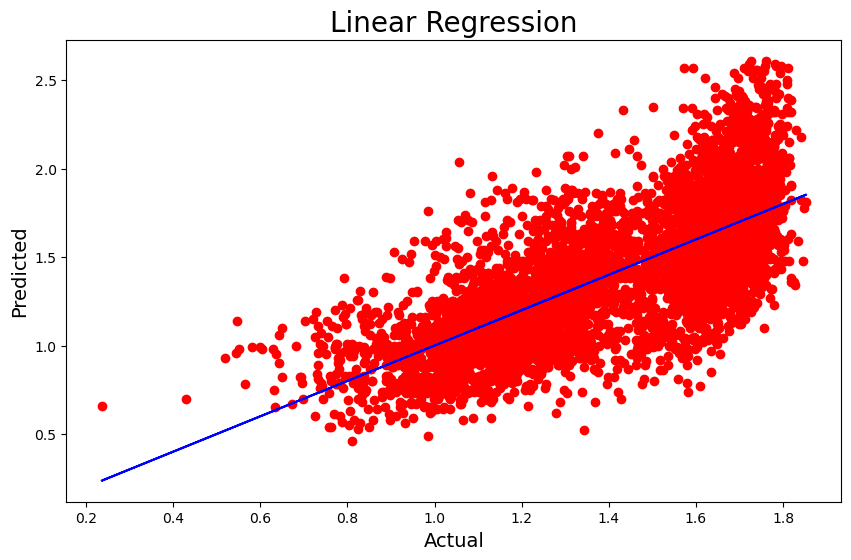

In [226]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=20)
plt.show()

In [227]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.8441531815695018
R2_score on training data: 97.66739692373434
Mean absolute error: 0.10659327794561932
Mean Squared Error: 0.023292186854229603
Root Mean Squared Error: 0.15261778026897654


In [228]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.8481940969014425
R2_score on training data: 89.67662019101175
Mean absolute error: 0.10634969788519638
Mean Squared Error: 0.022688249244712994
Root Mean Squared Error: 0.15062619043417713


In [229]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.6876921466227561
R2_score on training data: 69.26227603817448
Mean absolute error: 0.16365885804521757
Mean Squared Error: 0.04667617183439765
Root Mean Squared Error: 0.2160466890151239


In [230]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -0.00011315811836598577
R2_score on training data: 0.0
Mean absolute error: 0.3158006885918956
Mean Squared Error: 0.1494725576618381
Root Mean Squared Error: 0.3866168098541993


In [231]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.5245024540443461
R2_score on training data: 49.70143916620964
Mean absolute error: 0.2093359082797478
Mean Squared Error: 0.0710657926845386
Root Mean Squared Error: 0.2665816810745603


In [234]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.6842511673069734
R2_score on training data: 100.0
Mean absolute error: 0.14470543806646524
Mean Squared Error: 0.047190445619335344
Root Mean Squared Error: 0.2665816810745603


In [235]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.7100357028473674
R2_score on training data: 70.4230255543827
Mean absolute error: 0.15318075411902451
Mean Squared Error: 0.04333680121513973
Root Mean Squared Error: 0.20817492936263898


In [236]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.8720970350045938
R2_score on training data: 100.0
Mean absolute error: 0.09574391993957701
Mean Squared Error: 0.01911582020015105
Root Mean Squared Error: 0.13825997323936906


In [237]:
from sklearn.model_selection import cross_val_score

In [238]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_LR)-score.mean())*100)

[-0.0812524   0.15639709  0.38817893  0.13248353  0.16767961]
0.15269735123825548
Difference betweem r score and Cv is :  37.18366656931935


In [239]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.19825676 0.31628666 0.56786533 0.30215916 0.01546041]
0.2800056632781659
Difference betweem r score and Cv is :  56.41475182913359


In [240]:
score2=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.33067469  0.27365264  0.33213351  0.12963761 -0.03372843]
0.07420412920671464
Difference betweem r score and Cv is :  77.39899676947279


In [241]:
score3=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.28550327 0.36112539 0.55779871 0.35180829 0.14716498]
0.3406801269627575
Difference betweem r score and Cv is :  34.701201965999864


In [242]:
score4=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_lasso)-score4.mean())*100)

[-3.85189856 -0.63909317 -0.04763459 -0.44449249 -0.80022956]
-1.156669674837169
Difference betweem r score and Cv is :  115.65565167188029


In [243]:
score5=cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_rd)-score5.mean())*100)

[-0.08175564  0.15679497  0.38828393  0.13207811  0.1669554 ]
0.15247135441244236
Difference betweem r score and Cv is :  37.20310996319038


In [244]:
score6=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[-1.48398618 -0.24341472  0.22291119 -0.44883813 -0.3985526 ]
-0.47037608780263396
Difference betweem r score and Cv is :  115.46272551096072


In [245]:
score7=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_svr)-score7.mean())*100)

[-0.37917267  0.37982017  0.02426249  0.3195989  -0.09111788]
0.0506782017684686
Difference betweem r score and Cv is :  65.93575010788987


In [246]:
score8=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.20743496 0.33994137 0.62092436 0.38705291 0.12061661]
0.33519404045767204
Difference betweem r score and Cv is :  53.690299454692166


Our best fit moel is ExtraTreeRegressor

In [252]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'max_depth': [2,8,16,32,50],  
    'bootstrap': [True, False]
}

In [272]:
Model=ExtraTreesRegressor(criterion='mse',max_depth=8,bootstrap=True)

In [273]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred_rd))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.5245024540443461
Mean absolute error: 0.16570943662013427
Mean Squared Error: 0.048062160972963223
Root Mean Squared Error: 0.21923083946599126


In [274]:
import joblib

In [275]:
import pickle
filename='Avocado Project1.pkl'
pickle.dump(Model,open(filename,'wb'))  #saved model

In [276]:
import pickle
loaded_model=pickle.load(open('Avocado Project1.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

67.84185649287535


In [277]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
Predicted,1.017841,1.161196,1.034044,1.173197,1.694197,1.536417,1.176915,1.082985,1.141011,1.394569,...,1.168198,1.267773,1.573008,1.844981,1.732295,1.302341,1.098848,1.341577,1.275774,1.365925
Original,0.760000,0.960000,1.030000,0.840000,1.770000,1.360000,0.980000,0.900000,1.070000,1.250000,...,1.240000,1.220000,1.200000,2.020000,1.770000,1.230000,1.000000,1.310000,1.570000,1.280000


Now working with Classifaction Problem

In [278]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,2015,0.0
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,2015,0.0
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,2015,0.0
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,2015,0.0
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,2018,53.0
18245,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,2018,53.0
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,2018,53.0
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,2018,53.0


In [279]:
X=df.drop("region",axis=1)
Y=df["region"]

In [281]:
X.shape

(17651, 11)

In [282]:
Y.shape

(17651,)

In [283]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.195352,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013
1,-0.143510,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013
2,-1.232207,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013
3,-0.843387,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013
4,-0.324959,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756
17647,0.789660,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756
17648,1.204402,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756
17649,1.359930,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756


In [284]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF Values,Features
0,2.018698,AveragePrice
1,203.647267,Total Volume
2,23.961766,4046
3,42.078549,4225
4,3.284587,4770
5,120.152468,Total Bags
6,66.701023,Small Bags
7,9.113256,Large Bags
8,1.975705,XLarge Bags
9,2.696459,type


In [286]:
Y.value_counts()

0.0     338
16.0    338
49.0    338
44.0    338
39.0    338
38.0    338
35.0    338
34.0    338
32.0    338
30.0    338
26.0    338
23.0    338
19.0    338
18.0    338
27.0    338
8.0     338
2.0     338
13.0    338
12.0    338
11.0    338
4.0     338
5.0     338
10.0    338
9.0     338
20.0    337
1.0     337
28.0    337
33.0    336
41.0    336
40.0    336
14.0    336
50.0    336
31.0    335
24.0    335
25.0    333
48.0    333
21.0    333
53.0    332
7.0     332
22.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
29.0    325
46.0    307
42.0    301
45.0    292
6.0     290
15.0    272
52.0    256
51.0    169
Name: region, dtype: int64

In [288]:
#finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxACCU=0
maxRS=0

for i in range(1,20):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(X_train,Y_train)
    pred=RFC.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=1
print("best accuracy is:", maxACCU,  "at random state:",maxRS)        
        

best accuracy is: 0.9097432024169184 at random state: 1


In [289]:
# creating train test split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=maxRS)

In [290]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [291]:
#checking accuracy score for randomforestclassifier

RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
predRFC=RFC.predict(X_test)
print(accuracy_score(Y_test,predRFC))
print(confusion_matrix(Y_test,predRFC))
print(classification_report(Y_test,predRFC))

0.8991691842900302
[[ 91   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   1]
 [  0   0 116 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   0  66   0]
 [  0   1   1 ...   0   0  88]]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        98
         1.0       0.85      0.86      0.86       108
         2.0       0.94      0.95      0.94       122
         3.0       0.97      0.92      0.94        92
         4.0       0.96      0.96      0.96       114
         5.0       0.85      0.79      0.82       107
         6.0       0.98      0.97      0.97        91
         7.0       0.94      0.85      0.89       102
         8.0       0.97      0.96      0.96        98
         9.0       0.92      0.86      0.89       102
        10.0       0.85      0.82      0.83       114
        11.0       0.93      0.91      0.92       104
        12.0       0.98      0.93      0.96       118
        13.0       0.81      0.8

In [292]:
#checking accuracy score for Logistic Regression

LR=LogisticRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.5143504531722054
[[51  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  2]
 [ 0  0 77 ...  0  0  8]
 ...
 [ 0  0  0 ... 40  4  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  9  0 ...  0  0 26]]
              precision    recall  f1-score   support

         0.0       0.46      0.52      0.49        98
         1.0       0.27      0.23      0.25       108
         2.0       0.75      0.63      0.68       122
         3.0       0.55      0.35      0.43        92
         4.0       0.57      0.54      0.56       114
         5.0       0.46      0.48      0.47       107
         6.0       0.79      0.86      0.82        91
         7.0       0.59      0.73      0.65       102
         8.0       0.75      0.85      0.79        98
         9.0       0.48      0.71      0.57       102
        10.0       0.60      0.26      0.37       114
        11.0       0.39      0.52      0.44       104
        12.0       0.51      0.51      0.51       118
        13.0       0.68      0.38      0.48       101
        14.0  

In [293]:
#checking accuracy score for support vector machine

svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.709214501510574
[[ 87   0   0 ...   0   0   0]
 [  0  59   0 ...   0   0   0]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   0  63   0]
 [  0   1   0 ...   0   0  58]]
              precision    recall  f1-score   support

         0.0       0.48      0.89      0.62        98
         1.0       0.49      0.55      0.52       108
         2.0       0.95      0.90      0.92       122
         3.0       0.93      0.45      0.60        92
         4.0       0.90      0.66      0.76       114
         5.0       0.48      0.57      0.52       107
         6.0       0.95      0.99      0.97        91
         7.0       0.77      0.81      0.79       102
         8.0       0.91      0.95      0.93        98
         9.0       0.63      0.63      0.63       102
        10.0       0.71      0.43      0.54       114
        11.0       0.56      0.84      0.67       104
        12.0       0.88      0.67      0.76       118
        13.0       0.46      0.54

In [294]:
#checking accuracy score for GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB.fit(X_train,Y_train)
predGB=GB.predict(X_test)
print(accuracy_score(Y_test,predGB))
print(confusion_matrix(Y_test,predGB))
print(classification_report(Y_test,predGB))

0.8293051359516617
[[ 85   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   2]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   0  61   0]
 [  0   0   0 ...   0   0  82]]
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83        98
         1.0       0.83      0.72      0.77       108
         2.0       0.96      0.90      0.93       122
         3.0       0.82      0.82      0.82        92
         4.0       0.85      0.89      0.87       114
         5.0       0.79      0.76      0.77       107
         6.0       0.96      0.89      0.93        91
         7.0       0.89      0.78      0.83       102
         8.0       0.95      0.94      0.94        98
         9.0       0.89      0.84      0.86       102
        10.0       0.69      0.81      0.74       114
        11.0       0.89      0.89      0.89       104
        12.0       0.94      0.87      0.90       118
        13.0       0.76      0.7

In [295]:
#checking accuracy score for AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(X_train,Y_train)
predAB=AB.predict(X_test)
print(accuracy_score(Y_test,predAB))
print(confusion_matrix(Y_test,predAB))
print(classification_report(Y_test,predAB))

0.07175226586102719
[[ 0  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ... 26  0  0]
 [ 0  7  0 ...  2  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        98
         1.0       0.19      0.47      0.27       108
         2.0       0.00      0.00      0.00       122
         3.0       0.00      0.00      0.00        92
         4.0       0.12      0.24      0.16       114
         5.0       0.00      0.00      0.00       107
         6.0       0.00      0.00      0.00        91
         7.0       1.00      0.03      0.06       102
         8.0       0.11      0.47      0.18        98
         9.0       0.00      0.00      0.00       102
        10.0       0.00      0.00      0.00       114
        11.0       0.13      0.43      0.20       104
        12.0       1.00      0.01      0.02       118
        13.0       0.00      0.00      0.00       101
        14.0 

In [296]:
#checking accuracy score for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(X_train,Y_train)
predET=ET.predict(X_test)
print(accuracy_score(Y_test,predET))
print(confusion_matrix(Y_test,predET))
print(classification_report(Y_test,predET))

0.9110649546827795
[[ 91   0   0 ...   0   0   0]
 [  0  95   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   0  67   0]
 [  0   0   0 ...   0   0  89]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        98
         1.0       0.88      0.88      0.88       108
         2.0       0.95      0.98      0.97       122
         3.0       0.95      0.95      0.95        92
         4.0       0.96      0.96      0.96       114
         5.0       0.87      0.81      0.84       107
         6.0       0.99      0.99      0.99        91
         7.0       0.90      0.87      0.89       102
         8.0       0.97      0.96      0.96        98
         9.0       0.86      0.88      0.87       102
        10.0       0.85      0.86      0.86       114
        11.0       0.99      0.93      0.96       104
        12.0       0.97      0.93      0.95       118
        13.0       0.82      0.7

In [297]:
from sklearn.model_selection import cross_val_score

In [298]:
# checking cv score for RandomForestClassifier

score1 = cross_val_score(RFC,X,Y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predRFC) - score1.mean())*100)

[0.62163693 0.81189802 0.7509915  0.7        0.49518414]
0.6759421168878159
Difference between accuracy score and cross val score is - 22.32270674022143


In [299]:
# checking cv score for Logistic Regression

score2 = cross_val_score(LR,X,Y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predLR) - score2.mean())*100)

[0.52194846 0.49971671 0.47677054 0.32294618 0.26203966]
0.4166843088693185
Difference between accuracy score and cross val score is - 9.766614430288689


In [300]:
# checking cv score for GradientBoostingClassifier

score3 = cross_val_score(GB,X,Y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predGB) - score3.mean())*100)

KeyboardInterrupt: 

In [301]:
# checking cv score for support vector machine classifier

score4 = cross_val_score(svc,X,Y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predsvc) - score4.mean())*100)

[0.66411781 0.74050992 0.62464589 0.46402266 0.35750708]
0.5701606732116912
Difference between accuracy score and cross val score is - 13.90538282988828


In [302]:
# checking cv score for AdaBoost classifier

score5 = cross_val_score(AB,X,Y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predAB) - score5.mean())*100)

[0.04021524 0.05127479 0.07167139 0.07252125 0.0611898 ]
0.05937449205459054
Difference between accuracy score and cross val score is - 1.237777380643665


In [303]:
# checking cv score for Extratreesclassifier

score6 = cross_val_score(ET,X,Y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predET) - score6.mean())*100)

[0.68195978 0.79433428 0.76458924 0.7203966  0.50963173]
0.6941823252246593
Difference between accuracy score and cross val score is - 21.68826294581202


In [306]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
GCV=GridSearchCV(ExtraTreesClassifier(),param_grid,cv=5)
GCV.fit(X_train,Y_train)
GCV.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [308]:
final_model=ExtraTreesClassifier(min_samples_leaf=1,min_samples_split=5,max_depth=10,n_estimators=20)
final_model.fit(X_train,Y_train)
pred=final_model.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

75.88746223564955


In [309]:
# saving model using .pkl

import joblib
joblib.dump(final_model,'AVOCADO.pkl')

['AVOCADO.pkl']

In [311]:
#lets load the saved model and get the predictions

model=joblib.load('AVOCADO.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([25., 39., 42., ..., 29., 44., 43.])

In [312]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,25.0,37.0
1,39.0,2.0
2,42.0,50.0
3,51.0,36.0
4,0.0,33.0
...,...,...
5291,29.0,40.0
5292,24.0,11.0
5293,29.0,3.0
5294,44.0,23.0
